In [81]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import os
import pandas as pd

In [82]:
#variáveis auxiliares

pasta_resultados = "../results/"
pasta_dados = "../data/"

In [83]:
#load points from matlab file
from scipy.io import loadmat

points_2d = np.array(loadmat(pasta_dados+'points_2D.mat')['points_2D']).astype('int64')


points_2d

array([[116, 372,   1],
       [402, 343,   1],
       [286, 249,   2],
       [659, 137,   2],
       [400, 333,   3],
       [657, 149,   3],
       [112, 366,   4],
       [283, 255,   4],
       [126, 536,   5],
       [130, 377,   5],
       [183, 563,   6],
       [188, 373,   6],
       [266, 598,   7],
       [273, 367,   7],
       [401, 644,   8],
       [407, 356,   8],
       [541, 633,   9],
       [548, 230,   9],
       [132, 535,  10],
       [207, 530,  10],
       [415, 649,  11],
       [532, 632,  11],
       [380, 641,  12],
       [132, 537,  12],
       [535, 631,  13],
       [209, 530,  13],
       [547, 610,  14],
       [845, 578,  14],
       [549, 448,  15],
       [844, 445,  15],
       [551, 330,  16],
       [839, 349,  16]], dtype=int64)

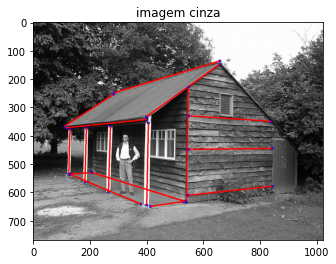

In [84]:
#print image with lines marked
image_file = pasta_dados+"hutme.jpg"

image = cv2.imread(image_file, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for i in range(0, len(points_2d), 2):
    cv2.circle(image, tuple([points_2d[i][0], points_2d[i][1]]), 5, (0, 0, 255), -1)
    cv2.circle(image, tuple([points_2d[i+1][0], points_2d[i+1][1]]), 5, (0, 0, 255), -1)
    cv2.line(image, tuple([points_2d[i][0], points_2d[i][1]]), tuple([points_2d[i+1][0], points_2d[i+1][1]]), (255, 0, 0), 3)

plt.imshow(image)
plt.title('imagem cinza')
plt.show()

In [85]:
#funções auxiliares para a criaçao das linhas e pontos de fulga

def cross_product(a, b):
    cross = [0, 0, 0]
    cross[0]= (a[1]*b[2])-(a[2]*b[1])
    cross[1]= (a[2]*b[0])-(a[0]*b[2])
    cross[2]= (a[0]*b[1])-(a[1]*b[0])
    return cross

def intersecao_2_linhas(L1, L2):
    ponto_intersecao = cross_product(L1, L2)
    ponto_intersecao = ponto_intersecao/ponto_intersecao[2]
    
    return ponto_intersecao

def cria_linhas(pontos):
    linhas = []
    for i in range(int(len(pontos)/2)):
        linhas.append(cross_product(pontos[2*i], pontos[2*i+1]))

    return linhas


def cria_pontos_fulga(linhas):
    pontos=[]
    for i in range(int(len(linhas)/2)):
        pontos.append(intersecao_2_linhas(linhas[2*i], linhas[2*i+1]))
    
    for i in range(len(pontos)):
        for j in range(len(pontos[i])):
            pontos[i][j]= int(np.round(pontos[i][j], 0))
    return np.array(pontos).astype('int64')


In [86]:
pontos_selecionados = np.concatenate((points_2d[0:8], points_2d[18:26], points_2d[-4:]))
#altera a ultima coordenada dos pontos 2d para ser 1
for i in range(len(pontos_selecionados)):
    pontos_selecionados[i][2]=1
    
pontos_de_fuga = cria_pontos_fulga(cria_linhas(pontos_selecionados))

pontos_de_fuga

array([[ -246,   409,     1],
       [ 2704, -1316,     1],
       [ 2105,   403,     1],
       [ -150,   419,     1],
       [ 2100,   432,     1]], dtype=int64)

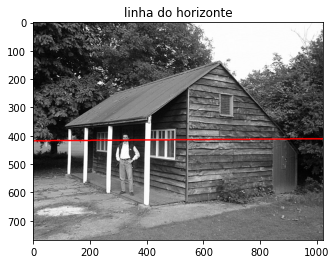

In [87]:
#traça linha do orizonte a partir dos pontos de fuga do segmento 10 e 11 com os segmentos 12 e 13
image = cv2.imread(image_file, cv2.IMREAD_COLOR)

cv2.line(image, tuple([pontos_de_fuga[2][0], pontos_de_fuga[2][1]]), tuple([pontos_de_fuga[3][0], pontos_de_fuga[3][1]]), (255, 0, 0), 3)
    
plt.imshow(image)
plt.title('linha do horizonte')
plt.show()

linha_do_horizonte = np.cross(pontos_de_fuga[2], pontos_de_fuga[3])

In [88]:
seg5e9 = np.concatenate((points_2d[8:10], points_2d[16:18]))

#altera a ultima coordenada dos pontos 2d para ser 1
for i in range(len(seg5e9)):
    seg5e9[i][2]=1

ponto_de_fuga_5e9 = cria_pontos_fulga(cria_linhas(seg5e9))[0]

ponto_de_fuga_5e9

array([  1472, -52971,      1], dtype=int64)

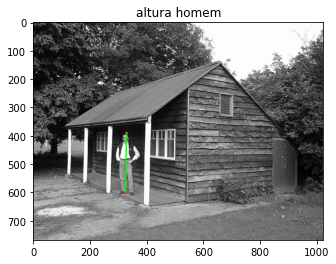

In [89]:
image = cv2.imread(image_file, cv2.IMREAD_COLOR)
homem1 = (330, 390) #cabeça
homem2 = (326, 600) #calcanhar

cv2.circle(image, homem1, 5, (255, 0, 0), -1)
cv2.circle(image, (), 5, (255, 0, 0), -1)
cv2.circle(image, homem2, 5, (255, 0, 0), -1)
cv2.line(image, homem1, homem2, (0, 255, 0), 3)

plt.imshow(image)
plt.title('altura homem')
plt.show()

In [125]:
#funções auxiliares para o calculo da razao de alturas


def distance(p1, p2):
    return math.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )


def razão_de_comprimento_paralelas(l, v, t1, t2, b1, b2):
    # Nesta função as variáveis simbolizam respectivamente:
    # l = linha de fuga do plano do chao
    # v = ponto de fuga vertical
    # t = pontos dos topos
    # b = pontos das bases
    d2 = distance(b2, t2)
    
    u = np.cross(np.cross(b1, b2), l)
    u = np.round((u/u[2]), 0)
    t1_til = np.cross(np.cross(t1, u), np.cross(v, b2))
    t1_til = np.round((t1_til/t1_til[2]), 0)
    
    #print(t1_til)
    
    t1_til = distance(t1_til, b2)
    t2 = distance(t2, b2)
    v = distance(v, b2)
    
    
    d1 = d2*((t1_til*(v-t2))/(t2*(v-t1_til)))
    return d1, d2

In [126]:
#cross ratio para descobrir altura do homem

altura_seg_9 = 294.3 #cm
pontos_seg_9 = points_2d[16:18]

cabeca = np.array([330, 390, 1])
calcanhar = np.array([326, 600, 1])

pontos_seg_9[0][2] = 1
pontos_seg_9[1][2] = 1

d1, d2 = razão_de_comprimento_paralelas(linha_do_horizonte, ponto_de_fuga_5e9, cabeca, pontos_seg_9[1], calcanhar, pontos_seg_9[0])

altura_homem = (d1*altura_seg_9)/d2

In [127]:
print(d1)
print(d2)
print(altura_homem)

248.3133128811897
403.0607894598531
181.30914713601317


In [129]:
#cross ratio para descobrir altura do seg8

altura_seg_9 = 294.3 #cm
pontos_seg_9 = points_2d[16:18]
pontos_seg_8 = points_2d[14:16]

pontos_seg_9[0][2] = 1
pontos_seg_9[1][2] = 1
pontos_seg_8[0][2] = 1
pontos_seg_8[1][2] = 1


d1, d2 = razão_de_comprimento_paralelas(linha_do_horizonte, ponto_de_fuga_5e9, pontos_seg_8[1], pontos_seg_9[1], pontos_seg_8[0], pontos_seg_9[0])

altura_seg_8 = (d1*altura_seg_9)/d2

In [130]:
print(d1)
print(d2)
print(altura_seg_8)

274.3853084694715
403.0607894598531
200.3459487854964
